# Song Recommendation System Based on Moods

## Loading Dataset

### Importing Libraries and loading dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset\spotify_data_with_instrumentalness.csv")

## Inspecting the Data

### Checking the first few rows

In [4]:
df.head()

,track_id,track_name,artist,artist_followers,artist_popularity,album,release_year,track_popularity,duration_ms,explicit,...,genres,danceability,energy,valence,tempo,loudness,speechiness,acousticness,liveness,instrumentalness
0,2dqjk8AmosqLig5qsZB9k3,Top Hits,Todays Top Hits,3332,27,Todays Top Hits 2022,2022,23,57142,0,...,NaN,0.80,0.7,0.6,120,-4,0.05,0.2,0.30,0.10
1,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,38589324,97,Not Like Us,2024,92,274192,1,...,"hip hop, west coast hip hop",0.75,0.8,0.3,90,-5,0.20,0.1,0.25,0.05
2,2cBcDL88A6c5IoFWceo7C7,Forget Him - Bonus Track,Bobby Rydell,102569,36,The Top Hits Of 1963 Sung By Bobby Rydell,1963,36,128280,0,...,"doo-wop, adult standards",0.80,0.7,0.6,120,-4,0.05,0.2,0.30,0.10
3,0WdzEA0iBZQLwxawVGORrS,Tip,Austin Rogers,941,29,Tip,2024,42,189604,1,...,NaN,0.60,0.6,0.5,100,-8,0.10,0.3,0.20,0.10
4,3ulDmkCpO8Guw2peg4nyKy,Top Hits 2023,Top Hits 2023,2111,9,Top Hits 2023,2023,4,69333,0,...,NaN,0.80,0.7,0.6,120,-4,0.05,0.2,0.30,0.10


### Checking the Dataset Shape (Rows and Columns)

In [5]:
df.shape

(174691, 21)

### Checking the column Names and Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174691 entries, 0 to 174690
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           174691 non-null  object 
 1   track_name         174689 non-null  object 
 2   artist             174691 non-null  object 
 3   artist_followers   174691 non-null  int64  
 4   artist_popularity  174691 non-null  int64  
 5   album              174690 non-null  object 
 6   release_year       174691 non-null  int64  
 7   track_popularity   174691 non-null  int64  
 8   duration_ms        174691 non-null  int64  
 9   explicit           174691 non-null  int64  
 10  track_type         174691 non-null  object 
 11  genres             118006 non-null  object 
 12  danceability       174691 non-null  float64
 13  energy             174691 non-null  float64
 14  valence            174691 non-null  float64
 15  tempo              174691 non-null  int64  
 16  lo

### Checking for missing Values

In [7]:
df.isnull().sum()

track_id                 0
track_name               2
artist                   0
artist_followers         0
artist_popularity        0
album                    1
release_year             0
track_popularity         0
duration_ms              0
explicit                 0
track_type               0
genres               56685
danceability             0
energy                   0
valence                  0
tempo                    0
loudness                 0
speechiness              0
acousticness             0
liveness                 0
instrumentalness         0
dtype: int64

We can see that majority of the missing values are popping up in the 'genre' feature, with few in 'track_name' and 'album'.

### Checking for Duplicate Rows

In [8]:
df.duplicated().sum()

107

Dropping duplicates

In [9]:
df_nodup = df.drop_duplicates()

In [10]:
df_nodup.duplicated().sum()

0

## Summary Statistics

### Numerical Data Summary

In [11]:
df_nodup.describe()

,artist_followers,artist_popularity,release_year,track_popularity,duration_ms,explicit,danceability,energy,valence,tempo,loudness,speechiness,acousticness,liveness,instrumentalness
count,1.745840e+05,174584.000000,174584.000000,174584.000000,1.745840e+05,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000
mean,1.832607e+06,35.393283,2015.167226,11.185584,2.241284e+05,0.104036,0.622835,0.628021,0.503881,101.787879,-7.241099,0.098317,0.287624,0.221368,0.200209
std,8.780276e+06,24.718291,32.395155,16.143269,1.910630e+05,0.305308,0.062969,0.069601,0.049953,6.542593,1.741244,0.024736,0.083030,0.046547,0.244520
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.500000,0.400000,0.300000,90.000000,-10.000000,0.050000,0.100000,0.150000,0.050000
25%,5.940000e+02,13.000000,2013.000000,0.000000,1.548748e+05,0.000000,0.600000,0.600000,0.500000,100.000000,-8.000000,0.100000,0.300000,0.200000,0.100000
50%,1.182400e+04,34.000000,2020.000000,3.000000,2.033715e+05,0.000000,0.600000,0.600000,0.500000,100.000000,-8.000000,0.100000,0.300000,0.200000,0.100000
75%,2.623420e+05,55.000000,2023.000000,16.000000,2.537600e+05,0.000000,0.600000,0.600000,0.500000,100.000000,-8.000000,0.100000,0.300000,0.200000,0.200000
max,1.387692e+08,100.000000,2025.000000,96.000000,1.132552e+07,1.000000,0.800000,0.800000,0.600000,120.000000,-3.000000,0.200000,0.700000,0.350000,0.900000


## Data Cleaning

### Checking for missing values

In [12]:
df_nodup.isnull().sum()

track_id                 0
track_name               2
artist                   0
artist_followers         0
artist_popularity        0
album                    1
release_year             0
track_popularity         0
duration_ms              0
explicit                 0
track_type               0
genres               56685
danceability             0
energy                   0
valence                  0
tempo                    0
loudness                 0
speechiness              0
acousticness             0
liveness                 0
instrumentalness         0
dtype: int64

Replacing missing values of 'track_name' and 'album'

In [13]:
df_nodup['track_name'].fillna('Unknown', inplace=True)
df_nodup['album'].fillna('Unknown', inplace=True)

C:\Users\athar\AppData\Local\Temp\ipykernel_27868\1184254690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nodup['track_name'].fillna('Unknown', inplace=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_27868\1184254690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['track_name'].fillna('Unknown', inplace=True)
C:\Users\

Replacing missing genres with "No Genre"

In [14]:
df_nodup['genres'].fillna('No Genre', inplace=True)

C:\Users\athar\AppData\Local\Temp\ipykernel_27868\3644638240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nodup['genres'].fillna('No Genre', inplace=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_27868\3644638240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['genres'].fillna('No Genre', inplace=True)


In [15]:
df_nodup.isnull().sum()

track_id             0
track_name           0
artist               0
artist_followers     0
artist_popularity    0
album                0
release_year         0
track_popularity     0
duration_ms          0
explicit             0
track_type           0
genres               0
danceability         0
energy               0
valence              0
tempo                0
loudness             0
speechiness          0
acousticness         0
liveness             0
instrumentalness     0
dtype: int64

## Feature Analysis

### List of Numerical Features

In [16]:
num_columns = [
    'artist_followers', 'artist_popularity', 'release_year', 'track_popularity',
    'duration_ms', 'explicit', 'tempo', 'loudness', 'danceability',
    'energy', 'valence', 'speechiness', 'acousticness', 'liveness', 'instrumentalness'
]


### Summary Statistics

In [17]:
df_nodup[num_columns].describe()

,artist_followers,artist_popularity,release_year,track_popularity,duration_ms,explicit,tempo,loudness,danceability,energy,valence,speechiness,acousticness,liveness,instrumentalness
count,1.745840e+05,174584.000000,174584.000000,174584.000000,1.745840e+05,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000,174584.000000
mean,1.832607e+06,35.393283,2015.167226,11.185584,2.241284e+05,0.104036,101.787879,-7.241099,0.622835,0.628021,0.503881,0.098317,0.287624,0.221368,0.200209
std,8.780276e+06,24.718291,32.395155,16.143269,1.910630e+05,0.305308,6.542593,1.741244,0.062969,0.069601,0.049953,0.024736,0.083030,0.046547,0.244520
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,90.000000,-10.000000,0.500000,0.400000,0.300000,0.050000,0.100000,0.150000,0.050000
25%,5.940000e+02,13.000000,2013.000000,0.000000,1.548748e+05,0.000000,100.000000,-8.000000,0.600000,0.600000,0.500000,0.100000,0.300000,0.200000,0.100000
50%,1.182400e+04,34.000000,2020.000000,3.000000,2.033715e+05,0.000000,100.000000,-8.000000,0.600000,0.600000,0.500000,0.100000,0.300000,0.200000,0.100000
75%,2.623420e+05,55.000000,2023.000000,16.000000,2.537600e+05,0.000000,100.000000,-8.000000,0.600000,0.600000,0.500000,0.100000,0.300000,0.200000,0.200000
max,1.387692e+08,100.000000,2025.000000,96.000000,1.132552e+07,1.000000,120.000000,-3.000000,0.800000,0.800000,0.600000,0.200000,0.700000,0.350000,0.900000


1. *Popularity & Followers*  
- Highly **skewed distribution** in **artist_followers** (mean: 1.8M, max: 138M), indicating a few artists dominate.  
- **track_popularity** is **low on average (11.2)** but reaches **96**, showing a wide range.  

2. *Song Characteristics*  
- Most songs have **danceability ~0.6**, **energy ~0.6**, and **valence ~0.5**, suggesting a balanced emotional spectrum.  
- **loudness varies from -10 dB to -3 dB**, aligning with general loudness levels in music.  

3. *Explicit Content*  
- Only **10%** of songs are marked explicit (**explicit mean: 0.1**).  

4. *Tempo & Duration*  
- **tempo ranges from 90-120 BPM**, a typical range for most genres.  
- **duration_ms is skewed** (mean: 224,000 ms ≈ 3.7 mins), but some tracks are extremely long (~3 hrs). 

### Distribution of Each Feature

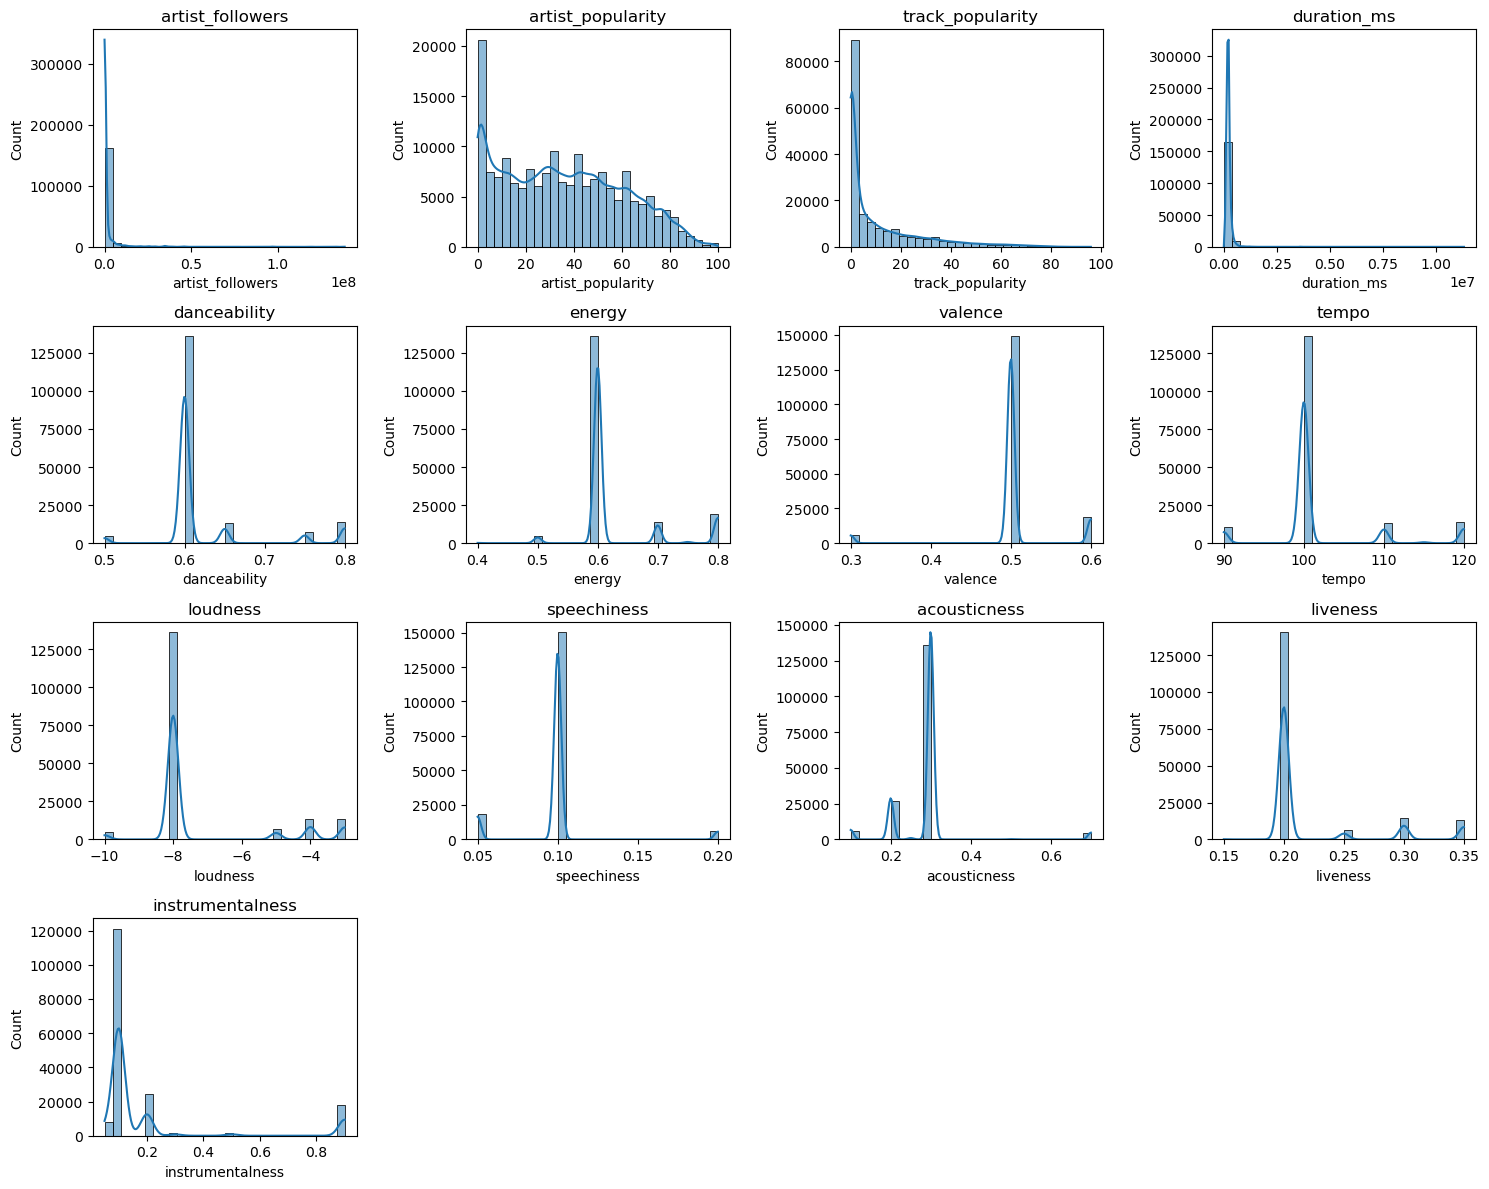

In [38]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_nodup[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

1. *Artist & Track Popularity*  
- **Highly skewed distribution** in **artist_followers** and **track_popularity**, meaning a few artists/tracks dominate the dataset.  
- **Most tracks have low popularity**, but a small number reach very high values.  

2. *Song Features & Trends*  
- **Danceability, energy, and valence** show **peaks around 0.6**, indicating most songs fall in a mid-range mood.  
- **Tempo is concentrated around 100 BPM**, with smaller peaks at 90 BPM and 120 BPM.  

3. *Audio Characteristics*  
- **Loudness is clustered around -8 dB**, meaning most songs are mixed within a standard dynamic range.  
- **Speechiness is low (~0.1)**, suggesting the dataset contains mostly musical tracks rather than spoken-word content.  
- **Acousticness and instrumentalness** have peaks near **low values**, implying the dataset mostly consists of modern, electronic, or pop music rather than acoustic or instrumental tracks.  

4. *Outliers & Skewness*  
- **Duration is highly skewed**, with most songs around 3-4 minutes but some extending much longer.  
- **Track popularity and artist followers** exhibit extreme right-skewness

### Correlation Analysis

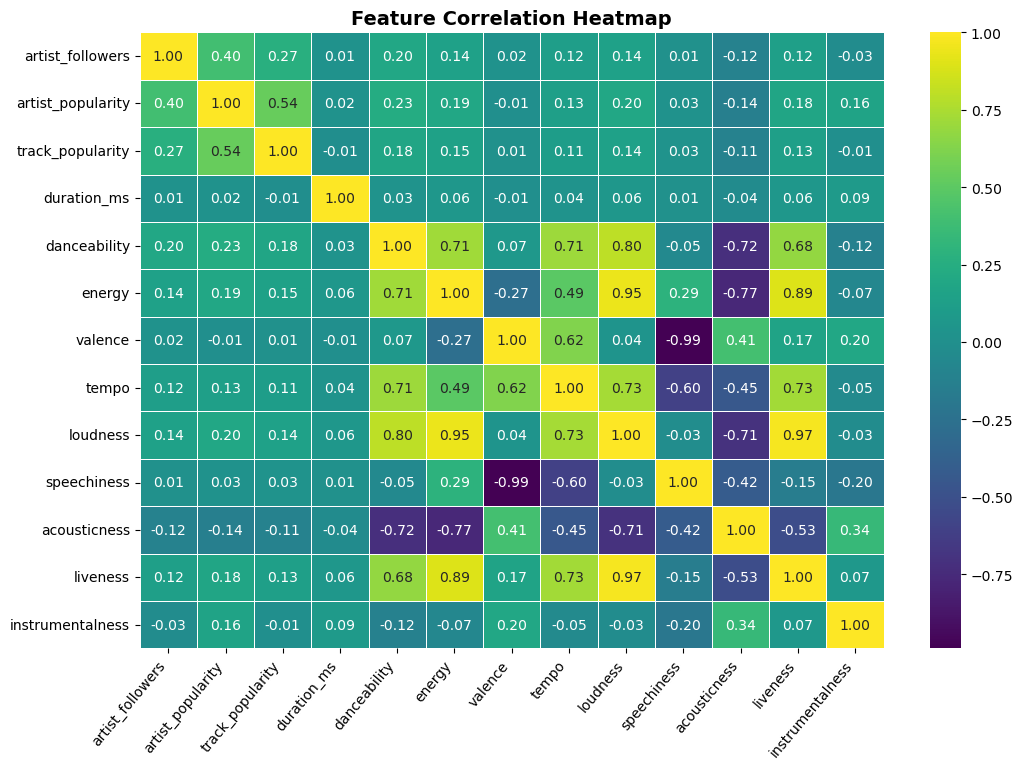

In [59]:
corr_matrix = df_nodup[num_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(rotation=50, ha='right')
plt.show()

🎯 **Key Observations**  
- *Artist Popularity & Followers (0.40)* 
  - Popular artists tend to have more followers, but the correlation is moderate, meaning some artists may have high followers but lower popularity.  

- *Track Popularity & Artist Popularity (0.54)*  
  - More popular artists generally have more popular songs, but track popularity is also influenced by other factors.  

- *Danceability, Energy & Tempo*  
  - **Danceability vs Energy (0.71)**: More energetic songs are also more danceable.  
  - **Danceability vs Tempo (0.62)**: Faster-paced songs tend to be more danceable.  

- *Loudness & Energy (0.95)*  
  - Strong positive correlation, indicating louder songs are more energetic.  

- *Valence & Danceability (0.62)*  
  - Happier (valence) songs tend to be more danceable.  

- *Acousticness vs Energy (-0.77)*  
  - Strong **negative correlation**, meaning acoustic songs tend to have lower energy.  

- *Speechiness vs Valence (-0.99)*  
  - Very strong **negative correlation**, meaning songs with more spoken words (like rap) tend to have lower valence (less "happiness").  

## Outlier Detection

### Visualizing Outliers

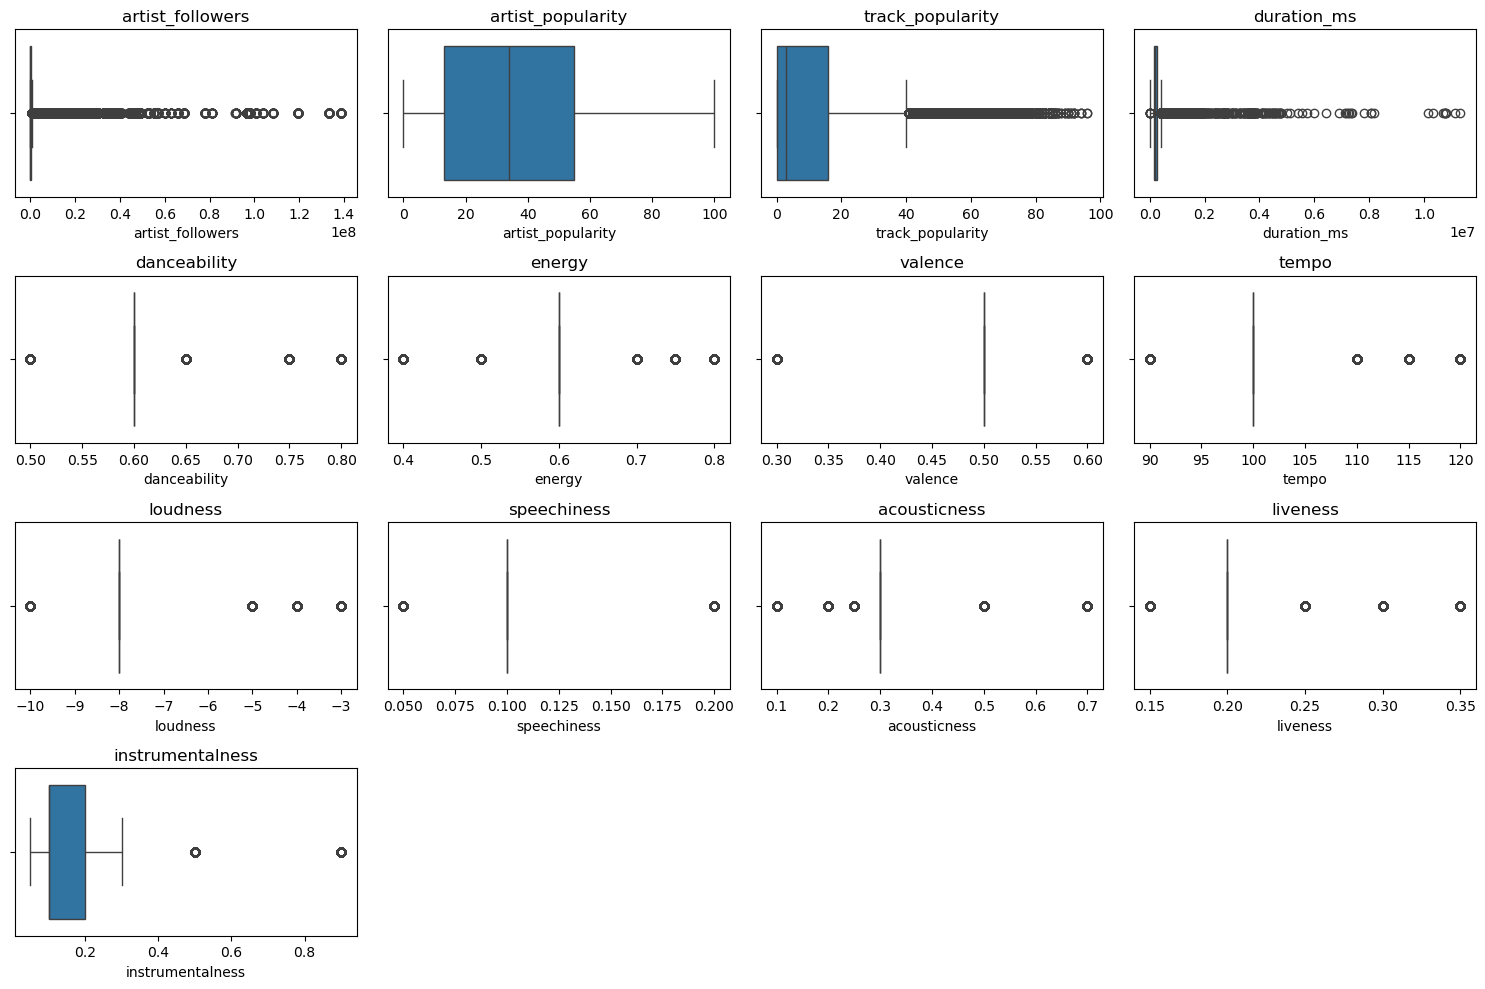

In [58]:
num_columns = [
    'artist_followers', 'artist_popularity', 'track_popularity', 'duration_ms',
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'speechiness', 'acousticness', 'liveness', 'instrumentalness'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_nodup[col])
    plt.title(col)
plt.tight_layout()
plt.show()

This image presents **boxplots** for various numerical features in the dataset. 

Key observations:
- **artist_followers** & **track_popularity**: Highly skewed with many outliers, indicating a few artists and tracks dominate in popularity.

- **danceability, energy, valence, tempo, instrumentalness**: Generally well-distributed, but some extreme values exist.
- **loudness & speechiness**: Have relatively narrow ranges but contain outliers.

- **duration_ms**: Right-skewed, meaning most songs are short, but a few are significantly long.
- **track_popularity**: Shows a similar trend, with a small number of tracks being extremely popular.


### Using IQR (Interquartile Range)
- identifies outliers without assuming a normal distribution.

In [21]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in num_columns:
    outliers = detect_outliers_iqr(df_nodup, col)
    print(f"{col}: {len(outliers)} outliers detected")

artist_followers: 32810 outliers detected
artist_popularity: 0 outliers detected
track_popularity: 12973 outliers detected
duration_ms: 8387 outliers detected
danceability: 38491 outliers detected
energy: 38491 outliers detected
valence: 25301 outliers detected
tempo: 38301 outliers detected
loudness: 38491 outliers detected
speechiness: 24402 outliers detected
acousticness: 38491 outliers detected
liveness: 34083 outliers detected
instrumentalness: 19753 outliers detected


### Using Z - Score
- Z-score detects outliers by checking if values are beyond ±3 standard deviations.

In [22]:
from scipy.stats import zscore

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = data[np.abs(z_scores) > threshold]
    return outliers

for col in num_columns:
    outliers = detect_outliers_zscore(df_nodup, col)
    print(f"{col}: {len(outliers)} outliers detected")


artist_followers: 2867 outliers detected
artist_popularity: 0 outliers detected
track_popularity: 4111 outliers detected
duration_ms: 1167 outliers detected
danceability: 0 outliers detected
energy: 190 outliers detected
valence: 6175 outliers detected
tempo: 0 outliers detected
loudness: 0 outliers detected
speechiness: 6175 outliers detected
acousticness: 4408 outliers detected
liveness: 0 outliers detected
instrumentalness: 0 outliers detected


## Data Visualization

### Visualizing Categorical Features

C:\Users\athar\AppData\Local\Temp\ipykernel_27868\2215152368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_nodup[col], palette="viridis")
C:\Users\athar\AppData\Local\Temp\ipykernel_27868\2215152368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_nodup[col], palette="viridis")


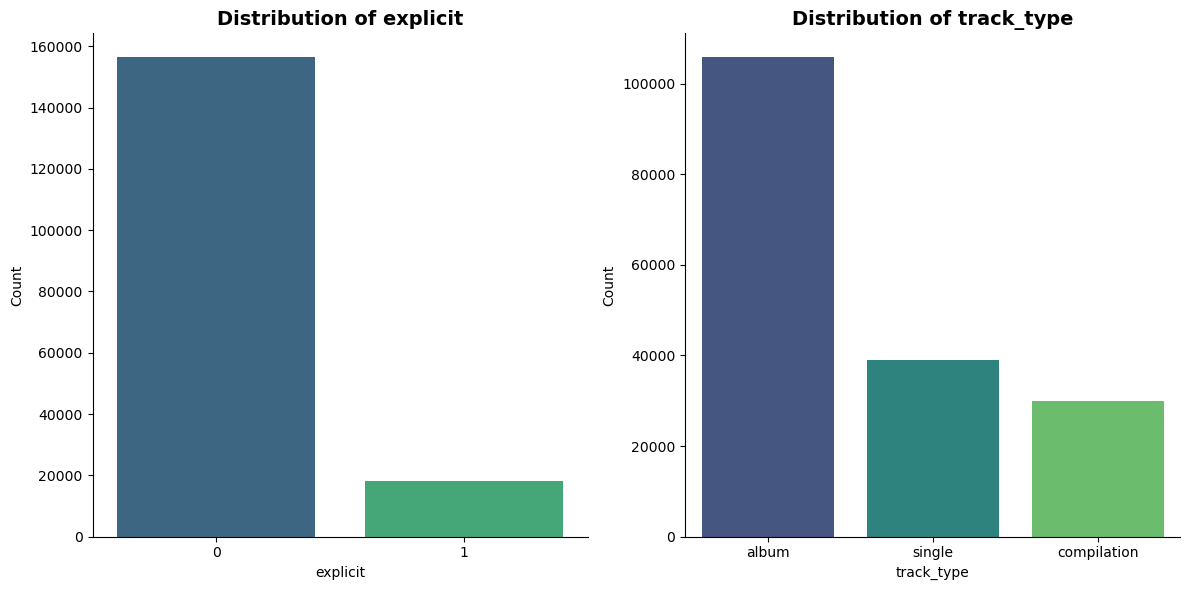

In [55]:
categorical_columns = ['explicit', 'track_type']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df_nodup[col], palette="viridis")
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
sns.despine()
plt.show()


🚨 **Explicit Content Distribution**  
- The majority of songs **(≈90%) are non-explicit (0)**.  
- Only a small fraction **(≈10%) are explicit (1)**.  
- This suggests that most songs in the dataset are suitable for all audiences, with explicit tracks forming a minority.  

🎵 **Track Type Distribution**  
- **Albums dominate** the dataset, accounting for the largest share of songs.  
- **Singles** are much fewer in number compared to albums but still make a significant portion.  
- **Compilation albums** have the least representation among the track types.  

🔍 **Key Takeaways**  
- **Explicit content is relatively rare**, indicating that the dataset skews towards clean or radio-friendly music.  
- **Albums are the primary format**, meaning most songs are released as part of larger collections rather than standalone singles.  
- **Compilations are less common**, possibly due to the shift in music consumption trends towards single releases and playlists.  



C:\Users\athar\AppData\Local\Temp\ipykernel_27868\4194928284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")


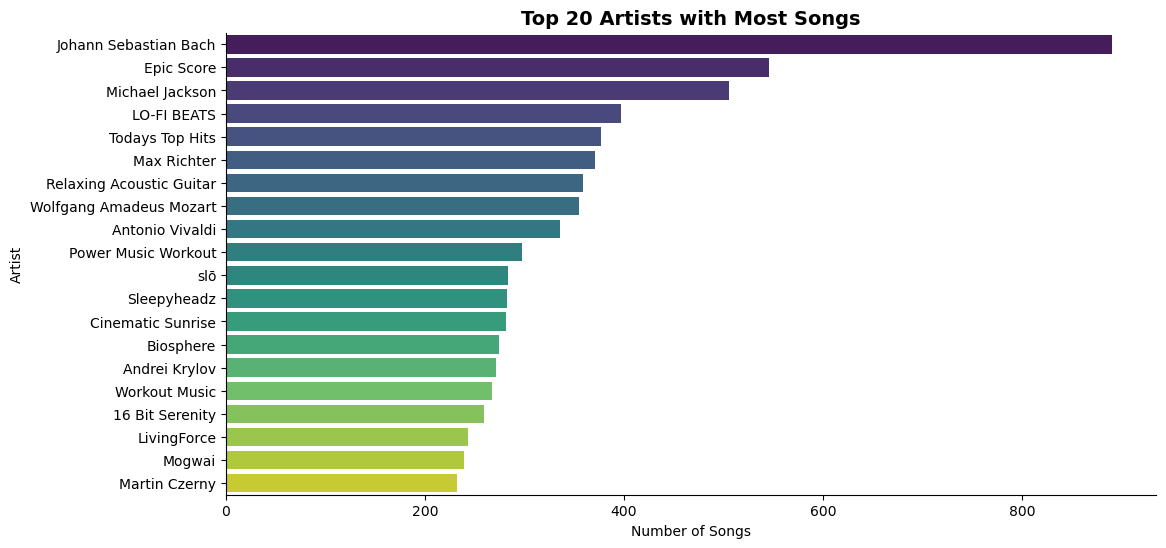

In [54]:
plt.figure(figsize=(12, 6))
top_artists = df_nodup['artist'].value_counts().head(20)
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.title("Top 20 Artists with Most Songs", fontsize=14, fontweight='bold')
sns.despine()
plt.show()



1️⃣ Johann Sebastian Bach Dominates  
- He has the **highest number of songs**, significantly more than any other artist.  
- Suggests a large catalog of classical music recordings.  

2️⃣ Epic Score & Michael Jackson Among Top Artists  
- **Epic Score** specializes in cinematic and trailer music 🎬, indicating a large collection of background scores.  
- **Michael Jackson**, the "King of Pop," has a vast catalog, reinforcing his global popularity.  

3️⃣ Strong Presence of Classical & Instrumental Music  
- **Wolfgang Amadeus Mozart, Antonio Vivaldi, and Max Richter** suggest a demand for **classical and neoclassical** music.  
- **Relaxing Acoustic Guitar, Biosphere, and 16 Bit Serenity** indicate popularity in **relaxing, ambient, and meditation music**.  

4️⃣ Workout & Focus-Driven Music is Popular  
- **Power Music Workout** and **Workout Music** suggest a significant audience for **exercise and fitness playlists**.  

5️⃣ Lo-Fi & Chill Music Gaining Traction  
- **LO-FI BEATS and Sleepyheadz** reflect the rising popularity of **Lo-Fi, study, and chill music**.  


C:\Users\athar\AppData\Local\Temp\ipykernel_27868\2384462063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


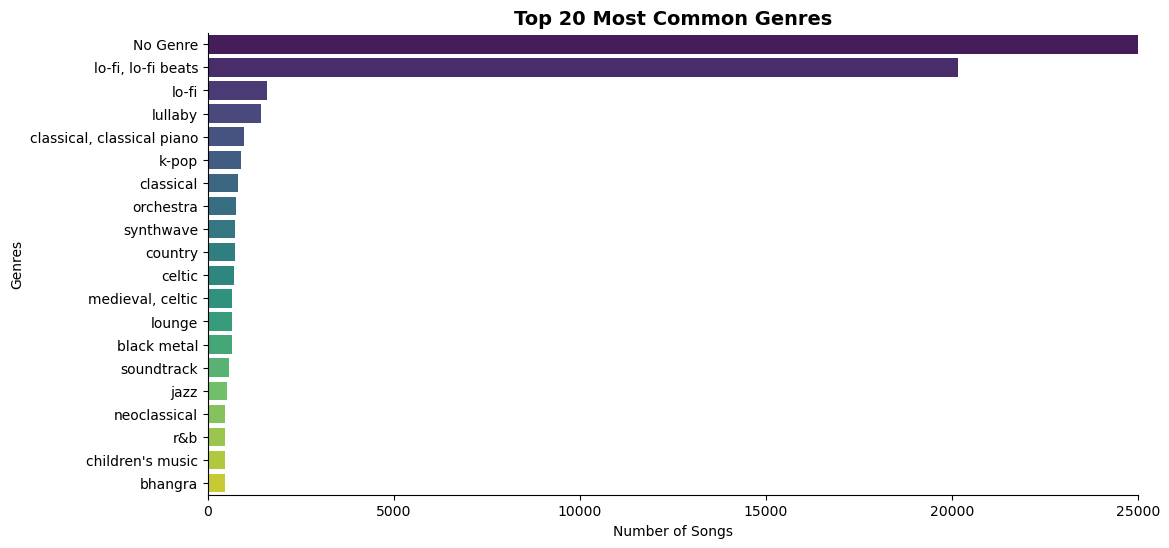

In [53]:
plt.figure(figsize=(12, 6))
top_genres = df_nodup['genres'].value_counts().head(20)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.xlabel("Number of Songs")
plt.ylabel("Genres")
plt.title("Top 20 Most Common Genres", fontsize=14, fontweight='bold')
plt.xlim(0,25000)
sns.despine()
plt.show()


1️⃣ Dominance of "No Genre" Labels  
- The most common category is **"No Genre"**, indicating a large number of tracks without proper genre classification.  
- This could be due to missing metadata, user-generated content, or non-standardized genre tagging.

2️⃣ Lo-Fi and Its Variants Are Popular  
- **"Lo-fi, lo-fi beats"** is the second most common genre, showing the increasing popularity of **chill, study, and ambient music**.  
- The presence of "lo-fi" as a separate genre also suggests inconsistencies in genre labeling.

3️⃣ Strong Presence of Classical & Instrumental Music  
- Genres like **"classical," "orchestra," "classical piano," and "neoclassical"** appear frequently.  
- This suggests a high number of **instrumental or mood-based music**, often used for relaxation or study.

4️⃣ Niche & Diverse Genres Make the List  
- The chart features unique genres such as **synthwave, black metal, lounge, jazz, and bhangra**, indicating a **diverse mix of musical styles**.  
- "Bhangra" being present suggests **regional and cultural music is also well-represented**.

5️⃣ Electronic & Ambient Influence  
- The presence of **synthwave, lounge, and soundtrack** genres suggests a growing trend in **electronic, cinematic, and ambient music** consumption.


### Visualizing Numerical Features

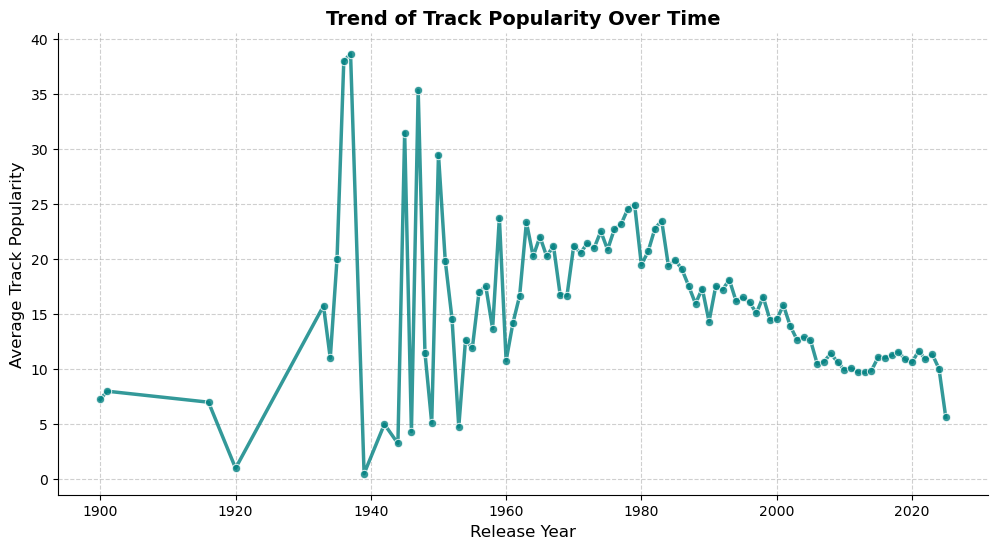

In [66]:
df_filtered = df_nodup[df_nodup['release_year'] >= 1900]
df_grouped = df_filtered.groupby('release_year')['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=df_grouped['release_year'],
    y=df_grouped['track_popularity'],
    marker="o",
    linewidth=2.5,
    color="teal",  
    alpha=0.8  
)

plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Track Popularity", fontsize=12)
plt.title("Trend of Track Popularity Over Time", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6) 
sns.despine() 
plt.show()

1️⃣ Fluctuations in Early 1900s  
- The **popularity of tracks before 1950** shows **high volatility**, with sharp peaks and drops.  
- This could be due to **limited data** from older records or **historical shifts in music trends**.  

2️⃣ Peak Popularity (1940s - 1980s)  
- The **1940s and 1950s** exhibit significant **spikes**, possibly indicating the rise of jazz, rock & roll, and early pop music.  
- The **1970s - 1980s** mark a **stable increase**, aligning with the golden era of rock, pop, and disco.  

3️⃣ Gradual Decline After 1980s  
- After peaking in the late **1970s and 1980s**, **track popularity** trends downward.  
- This could be attributed to **music diversification**, streaming services, or changes in how popularity is measured.  

4️⃣ Recent Years (2000 - Present)  
- The **2000s - 2010s** show a more **consistent but declining** trend.  
- This might be due to **modern streaming algorithms favoring newer releases**, causing older tracks to appear less popular.  

5️⃣ Sudden Drop Post-2020  
- A **sharp decline in recent years** could indicate **incomplete data** for recent releases or **lower popularity scores due to streaming shifts**.  

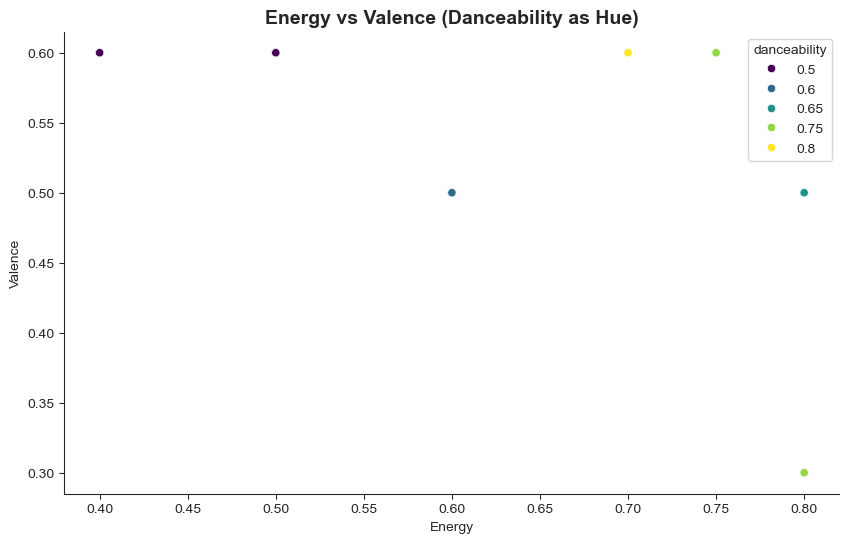

In [71]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
sns.scatterplot(x=df_nodup['energy'], y=df_nodup['valence'], hue=df_nodup['danceability'], palette="viridis")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.title("Energy vs Valence (Danceability as Hue)", fontsize=14, fontweight='bold')
sns.despine()
plt.show()


1️⃣ General Trend  
- The scatter plot shows the relationship between **energy** (x-axis) and **valence** (y-axis), with **danceability** represented by color intensity.  
- Higher danceability values appear in **brighter yellow-green shades**, while lower danceability values are in **darker shades**.  

2️⃣ Clusters & Distribution  
- The points seem **evenly spread**, suggesting a diverse range of songs with varying energy and valence levels.  
- Some **higher-energy songs** (above ~0.7 energy) also have **lower valence**, meaning that not all energetic songs are necessarily perceived as happy.  
- Conversely, songs with **moderate energy (0.4 - 0.6)** show a mix of both **high and low valence**, indicating a broad emotional spectrum.  

3️⃣ Impact of Danceability  
- Songs with **higher danceability** (yellow) are spread **towards higher valence**, suggesting that **happier songs tend to be more danceable**.  
- Lower danceability tracks (darker hues) are **more randomly scattered**, indicating that some songs may have high energy but are not necessarily danceable.  

4️⃣ Outliers & Unique Cases  
- There are **a few points at low valence (~0.3)** but still **high energy (~0.8)**. These might represent **high-energy but emotionally intense tracks** rather than joyful ones.  
- Some **low-energy and high-valence** tracks exist, likely representing **calm, relaxing, and positive songs**.  


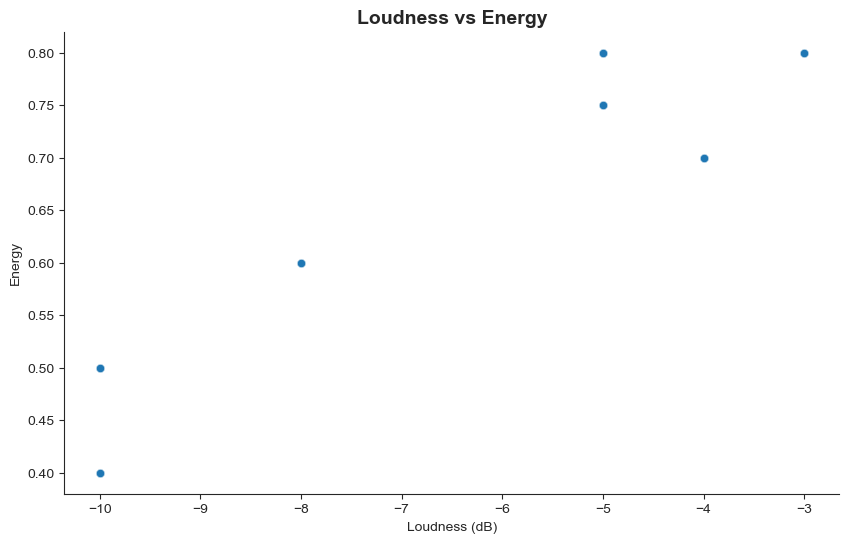

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_nodup['loudness'], y=df_nodup['energy'], alpha=0.5)
plt.xlabel("Loudness (dB)")
plt.ylabel("Energy")
plt.title("Loudness vs Energy", fontsize=14, fontweight='bold')
sns.despine()
plt.show()


1️⃣ General Relationship  
- The plot explores the relationship between **Loudness (dB)** and **Energy** of tracks.  
- As **loudness increases (moves towards -3 dB from -10 dB)**, **energy tends to increase**, suggesting a **positive correlation**.  

2️⃣ Observed Trends  
- **Lower-energy tracks** (~0.4 - 0.5 energy) are found at **lower loudness levels** (~-10 dB), indicating they might be softer or more mellow songs.  
- **Higher-energy tracks** (~0.7 - 0.8 energy) are generally louder (~-3 dB to -5 dB), which aligns with the expectation that high-energy songs are more intense.  

3️⃣ Spread of Data  
- The points are somewhat **spread out but show a clear upward trend**, reinforcing the idea that louder songs generally have higher energy.  
- However, there is some **variation**, meaning that **not all loud songs are high-energy**, and vice versa.  
